In [1]:
# Import the necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read in the datasets
data = pd.read_csv('/content/Books.csv')
users = pd.read_csv('/content/Users.csv')
ratings = pd.read_csv('/content/Ratings.csv')

In [3]:
# Print the head of the Books DataFrame
data = data.iloc[:100000,:]
data.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
# Print a concise summary of the Books DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35566 entries, 0 to 35565
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ISBN                 35566 non-null  object
 1   Book-Title           35566 non-null  object
 2   Book-Author          35566 non-null  object
 3   Year-Of-Publication  35566 non-null  int64 
 4   Publisher            35566 non-null  object
 5   Image-URL-S          35566 non-null  object
 6   Image-URL-M          35566 non-null  object
 7   Image-URL-L          35565 non-null  object
dtypes: int64(1), object(7)
memory usage: 2.2+ MB


In [5]:
# Print the head of the Users DataFrame
users = users.iloc[:100000,:]
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [6]:
# Print a concise summary of the Users DataFrame
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   100000 non-null  int64  
 1   Location  100000 non-null  object 
 2   Age       60269 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.3+ MB


In [7]:
# Print the head of the Ratings DataFrame
ratings = ratings.iloc[:100000,:]
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0.0
1,276726,0155061224,5.0
2,276727,0446520802,0.0
3,276729,052165615X,3.0
4,276729,0521795028,6.0


In [8]:
# Print a concise summary of the Books DataFrame
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   User-ID      100000 non-null  int64  
 1   ISBN         100000 non-null  object 
 2   Book-Rating  100000 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.3+ MB


In [9]:
# Merge Books and Ratings dataframes
data = pd.merge(data,ratings,on='ISBN')

In [10]:
# Reindex and rename the columns of the DataFrame
data = data.reindex(columns=["ISBN", "User-ID", "Book-Title", "Book-Author", "Year-Of-Publication", "Publisher", "Book-Rating", "Image-URL-S", "Image-URL-M", "Image-URL-L"])
data.rename(columns={"User-ID" : "user_id", 'Book-Title' : 'Title', 'Book-Author' : 'Author', "Book-Rating" : "Rating"}, inplace=True)

In [11]:
# Print the head of the new dataframe
data = data.iloc[:100000,:]
data.head()

,ISBN,user_id,Title,Author,Year-Of-Publication,Publisher,Rating,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,2,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,0.0,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,5.0,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0002005018,11400,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,0.0,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
3,0002005018,11676,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8.0,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
4,0060973129,8,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,0.0,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...


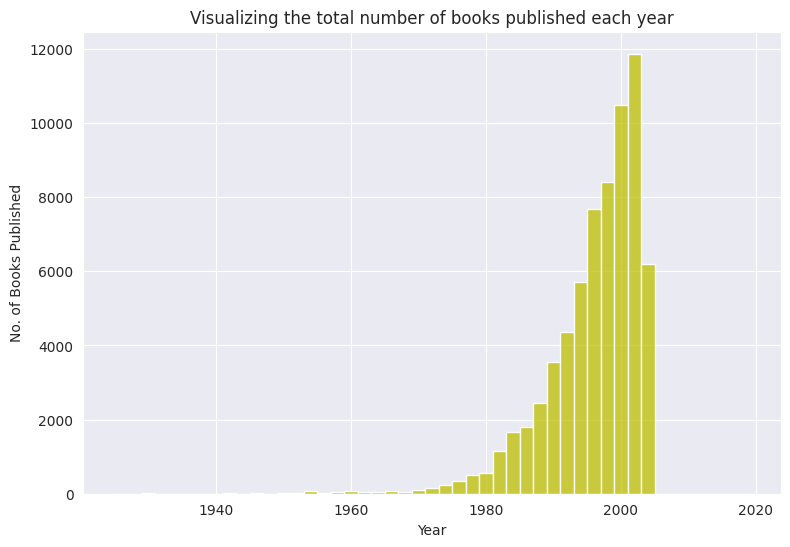

In [12]:
# Visualize the number of books published each year through histogram
data['Year-Of-Publication'] = data['Year-Of-Publication'].astype('int64')
sns.set_style('darkgrid')
fig, ax =plt.subplots()
fig.set_size_inches(9,6)
a=np.arange(1925,2021,3)
sns.histplot(data['Year-Of-Publication'],bins=np.arange(1925,2021,2),color='y')
plt.ylabel('No. of Books Published')
plt.xlabel('Year')
plt.title('Visualizing the total number of books published each year')
plt.show()

In [13]:
# Visualize the number of books published each year individaully
data['Year-Of-Publication'].value_counts()

2002    6415
2001    5459
1999    5337
2000    5145
2003    4677
        ... 
1945       1
1923       1
2020       1
1939       1
1926       1
Name: Year-Of-Publication, Length: 75, dtype: int64

In [14]:
# Visualize the number of books published by each publisher
data['Publisher'].value_counts()

Ballantine Books                       2620
Pocket                                 2264
Berkley Publishing Group               2046
Warner Books                           1811
Bantam Books                           1658
                                       ... 
Kurtzman Sales Inc                        1
Berkshire House Publishers                1
Independent Music Press                   1
Ullstein                                  1
Two Thirteen Sixty One Publications       1
Name: Publisher, Length: 3854, dtype: int64

In [15]:
# Visualize the mean rating count of the books data
rating_cnt = pd.DataFrame(data.groupby('Title').mean()['Rating'])
rating_cnt = rating_cnt.reset_index()
px.histogram(rating_cnt,x='Rating',marginal='box',nbins=15,width=750,height=500)

In [16]:
new_data = pd.DataFrame(data.groupby("Title").mean()["Rating"])
new_data['Num_of_ratings'] = pd.DataFrame(data.groupby('Title').count()['Rating'])

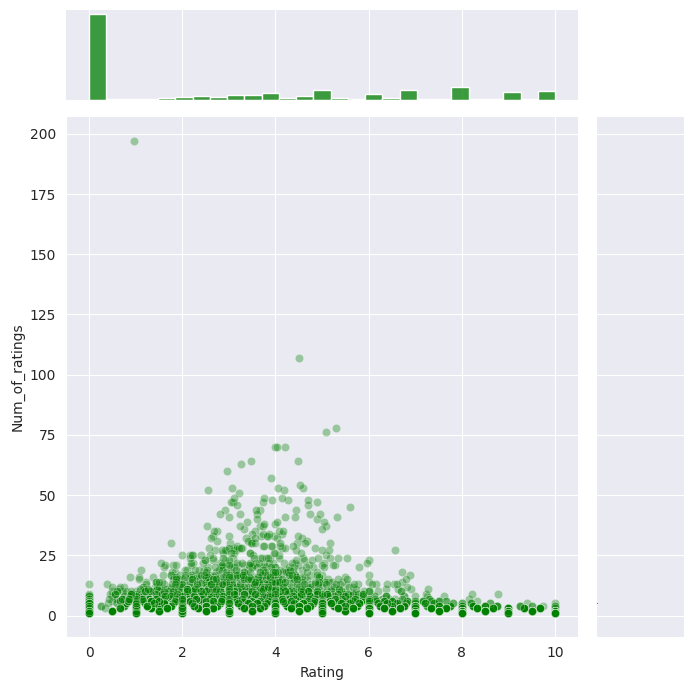

In [17]:
# Visualize the distribution of ratings
sns.jointplot(x="Rating", y="Num_of_ratings", data=new_data, alpha=0.35,height=7,color='g')
plt.show()

In [18]:
# Visualizing top 10 books with highest no. of ratings
new_data.sort_values(by=['Num_of_ratings','Rating'],ascending=False).head(10)

,Rating,Num_of_ratings
Title,,
Wild Animus,0.954315,197
The Lovely Bones: A Novel,4.504673,107
The Secret Life of Bees,5.294872,78
The Da Vinci Code,5.078947,76
The Nanny Diaries: A Novel,4.214286,70
Life of Pi,4.042857,70
Divine Secrets of the Ya-Ya Sisterhood: A Novel,4.000000,70
The Red Tent (Bestselling Backlist),4.484375,64
A Painted House,3.468750,64


In [19]:
# Visualizing top 10 most prolific authors
data.groupby('Author').count().sort_values('Rating',ascending=False)['Title'].head(10)

Author
Stephen King          700
Nora Roberts          496
John Grisham          480
James Patterson       421
Mary Higgins Clark    390
Dean R. Koontz        349
Tom Clancy            289
Danielle Steel        287
Janet Evanovich       284
Sue Grafton           255
Name: Title, dtype: int64

##Data Cleaning & Feature Engineering

In [20]:
# Create a new DataFrame with average rating of each title and total no. of ratings
new_data = pd.DataFrame(data.groupby("Title").mean()["Rating"])
new_data['Num_of_ratings'] = pd.DataFrame(data.groupby('Title').count()['Rating'])
new_data.head()

,Rating,Num_of_ratings
Title,,
"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",0.0,1
Beyond IBM: Leadership Marketing and Finance for the 1990s,0.0,1
It Takes Two,0.0,1
"Q-Space (Star Trek The Next Generation, Book 47)",0.0,1
Tales of Terror and Suspense,0.0,1


In [21]:
# Create a pivot table/crosstab with the DataFrame
data_pivot = data.pivot_table(index="user_id", columns="Title", values="Rating")
data_pivot.head()

Title,"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",Beyond IBM: Leadership Marketing and Finance for the 1990s,It Takes Two,"Q-Space (Star Trek The Next Generation, Book 47)",Tales of Terror and Suspense,$oft Money: The True Power in Our Nation's Capital,"' Sie belieben wohl zu scherzen, Mr. Feynman.'. Abenteuer eines neugierigen Physikers.",' Small g'. Eine Sommeridylle.,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...,iI Paradiso Degli Orchi,"metamorfosis, La (ClÃ¡sicos selecciÃ³n series)",seaQuest 2,stardust,the Heiress Bride (sister brides),why I'm like this : True Stories,Â¿QuiÃ©n se ha llevado mi queso?,"Â¿QuÃ© me quieres, amor?",Ã?Â?ber die Freiheit.,Ã?Â?bermorgen.
user_id,,,,,,,,,,,,,,,,,,,,,
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Generating Recommendations

In [22]:
# Recommending top 10 books correlated with 'The Da Vinci Code'
da_vinci = pd.DataFrame(data_pivot.corrwith(data_pivot['The Da Vinci Code']),columns=['Correlation'])
da_vinci.dropna(inplace=True)
recom = da_vinci.join(new_data['Num_of_ratings'])
recom = recom.reset_index()
recom[recom.Num_of_ratings>40].sort_values(by=['Correlation','Num_of_ratings'],ascending=False).head(10)

,Title,Correlation,Num_of_ratings
1214,The Da Vinci Code,1.000000,76
1171,The Brethren,1.000000,47
1505,The Summons,0.845626,42
1196,The Client,0.739153,51
1423,The Pelican Brief,0.702524,60
1402,The Nanny Diaries: A Novel,0.633792,70
559,Harry Potter and the Sorcerer's Stone (Harry P...,0.575758,53
1589,Timeline,0.519361,44
592,House of Sand and Fog,0.505445,53
1518,The Testament,0.495832,52


In [23]:
# Recommending top 10 books correlated with 'Life of Pi'
life = pd.DataFrame(data_pivot.corrwith(data_pivot['Life of Pi']),columns=['Correlation'])
life.dropna(inplace=True)
recom2 = life.join(new_data['Num_of_ratings'])
recom2 = recom2.reset_index()
recom2[recom2.Num_of_ratings>40].sort_values(by=['Correlation','Num_of_ratings'],ascending=False).head(10)

,Title,Correlation,Num_of_ratings
685,Life of Pi,1.000000,70
1147,The Brethren,1.000000,47
1140,The Bonesetter's Daughter,1.000000,42
537,Harry Potter and the Sorcerer's Stone (Harry P...,0.991837,53
990,She's Come Undone (Oprah's Book Club (Paperback)),0.857104,42
1178,The Client,0.844656,51
1075,Summer Sisters,0.731957,52
991,She's Come Undone (Oprah's Book Club),0.727607,42
533,Harry Potter and the Chamber of Secrets (Book 2),0.645865,48
1617,White Oleander : A Novel,0.620134,53


In [24]:
# Recommending top 10 books correlated with 'The Secret Life of Bees'
secret = pd.DataFrame(data_pivot.corrwith(data_pivot['The Secret Life of Bees']),columns=['Correlation'])
secret.dropna(inplace=True)
recom3 = secret.join(new_data['Num_of_ratings'])
recom3 = recom3.reset_index()
recom3[recom3.Num_of_ratings>40].sort_values(by=['Correlation','Num_of_ratings'],ascending=False).head(10)

,Title,Correlation,Num_of_ratings
1767,The Secret Life of Bees,1.000000,78
1798,The Summons,0.906217,42
1227,She's Come Undone (Oprah's Book Club),0.607815,42
842,Life of Pi,0.552837,70
1892,Timeline,0.461361,44
2011,White Oleander : A Novel,0.444252,53
1523,The Five People You Meet in Heaven,0.371427,41
660,Harry Potter and the Sorcerer's Stone (Harry P...,0.349561,53
1715,The Pilot's Wife : A Novel,0.347149,48
1604,The Joy Luck Club,0.282903,49
